In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
path = os.path.join('C:/Users/ss/Desktop/0study/TML2221 - MACHINE LEARNING/2 Tutorial/Untitled Folder/titanic_train.csv')

In [7]:
data = pd.read_csv(path)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

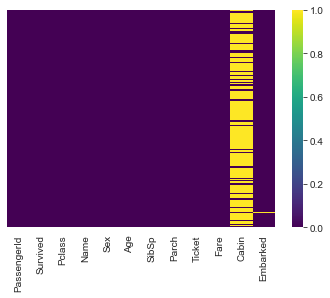

In [24]:
sns.heatmap(data.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

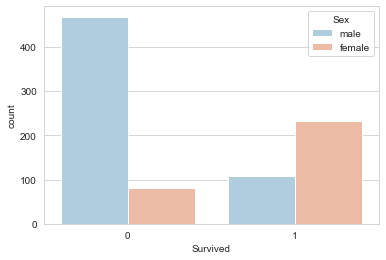

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

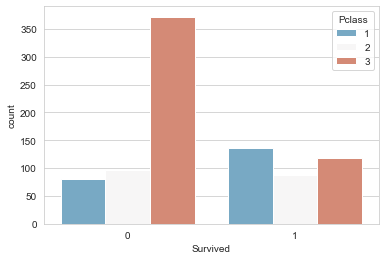

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

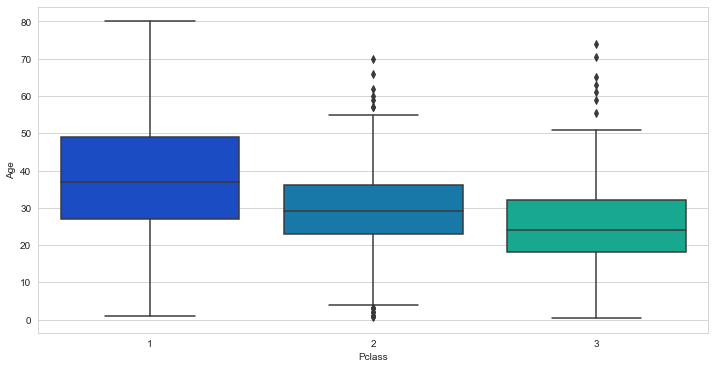

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=data,palette='winter')

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [27]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1) #axis=1 meanscolumn

<AxesSubplot:>

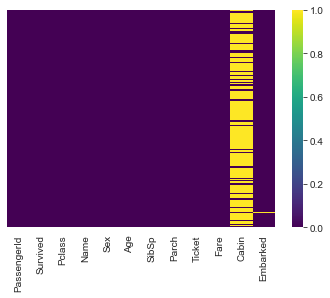

In [28]:
sns.heatmap(data.isnull(),yticklabels=False, cmap='viridis')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
data.drop('Cabin',axis=1, inplace=True) # inplace mean replace the old dataset

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
data.dropna(inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [35]:
sex = pd.get_dummies(data['Sex'])
embark = pd.get_dummies(data['Embarked'])

In [36]:
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [37]:
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
data.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [40]:
data = pd.concat([data, sex, embark], axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   female       889 non-null    uint8  
 8   male         889 non-null    uint8  
 9   C            889 non-null    uint8  
 10  Q            889 non-null    uint8  
 11  S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 59.9 KB


In [42]:
from sklearn.model_selection import train_test_split

# drop survived because it is label
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                   data['Survived'],
                                                   test_size=0.3,
                                                   random_state=101)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 11)
(267, 11)
(622,)
(267,)


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
pred = lr.predict(X_test)

In [47]:
from sklearn import metrics

#compare predict to real label(y_test is real label)
print('Accuracy', metrics.accuracy_score(y_test, pred))
print('Precision', metrics.precision_score(y_test, pred))
print('Recall', metrics.recall_score(y_test, pred))

Accuracy 0.8164794007490637
Precision 0.8313253012048193
Recall 0.6634615384615384


In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

In [50]:
print(cm)

[[149  14]
 [ 35  69]]


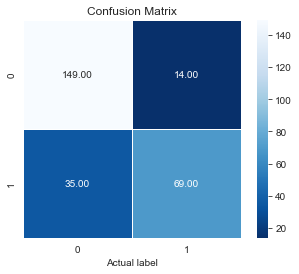

In [52]:
class_names = [0,1]

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm,
           annot=True,
           fmt='.2f',
           linewidth=0.5,
           square=True,
           cmap='Blues_r')

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.xlabel('Actual label')
plt.show()

In [61]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y = True)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
type(X)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=1/7,
                                                   random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [59]:
pred = lr.predict(X_test)

In [60]:
# multiclass classification
score = lr.score(X_test, y_test)
print(score)

0.8164794007490637


In [ ]:
plt.figure(figsize=(20,4))

for index in range(5):
    plt.subplot(1,5,index+1)
    plt.imshow(X_train.to_numpy()[index].reshape(28,28), cmap=plt.cm.gray)
    plt.title('Training: %i \n' % int(y_train.to_numpy()[index]))